### FEM for submerged tunnel as 3D beams

In [1]:
import numpy as np
import scipy.linalg as scp
import matplotlib.pylab as plt
import time

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
pass

## Visualize the tunnel

- Radius = 2683 m
- Distance between landings = 3700 m
- Angular span = [68.2 deg, 111.8 deg]

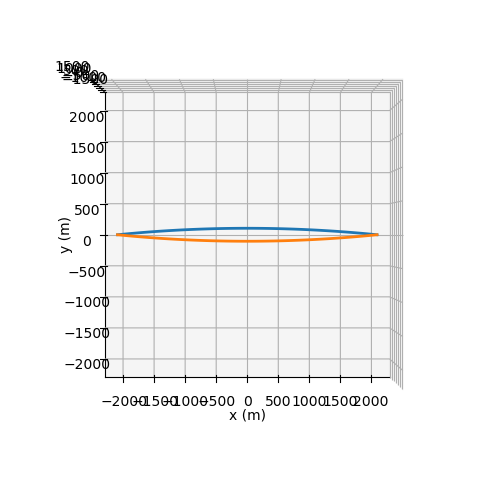

In [2]:
TunRad = 20050 #m
TunAng = (95.725, 84.275) #deg
steps = 50
dth = (TunAng[0] - TunAng[1]) / steps #deg


TunCX = TunRad*np.cos( np.deg2rad( np.arange(TunAng[0], TunAng[1]-1e-5, -dth) ) )
TunCY = TunRad*np.sin( np.deg2rad( np.arange(TunAng[0], TunAng[1]-1e-5, -dth) ) )
TunCY = TunCY - min(TunCY) + 0.01
TunCZ = 0*TunCX

TunCX2 = TunCX
TunCY2 = -1*TunCY
TunCZ2 = TunCZ

L_cable = TunCY - TunCY2

ax = plt.axes(projection='3d')
ax.view_init(90, 270)
plt.plot(TunCX, TunCY, TunCZ, lw=2)
plt.plot(TunCX2, TunCY2, TunCZ2, lw=2)
plt.grid("on")
plt.axis("equal")
plt.xlabel('x (m)')
plt.ylabel('y (m)')

TunCX = np.append(TunCX, TunCX2)
TunCY = np.append(TunCY, TunCY2)
TunCZ = np.append(TunCZ, TunCZ2)


## Properties of Beam

In [3]:

Beam_m = 1.15e5                  # [kg/m]
Beam_EI = 6.14e12                 # [N.m2]
Beam_EA = 1.25e12                 # [N]
Beam_GJ = 4.91e13                 # [N.m2]
Beam_Im = 30     

Conn_m = 1.28e3                  # [kg/m]
Conn_EI = 1                 # [N.m2]
Conn_EA = 1.08e9                 # [N]
Conn_GJ = 1                 # [N.m2]
Conn_Im = 1     
Conn_Ten = 1e6 #[N]

## Mesh setup

In [4]:
NodeC = [ [x,y,z] for x,y,z in zip(TunCX, TunCY, TunCZ) ]
nNode = len(NodeC)

#print(nNode)

# Define elements (and their properties
#             NodeLeft    NodeRight          m         EA        EI  GJ  Im
# Tunnel elemenets
Ele = [ [n1, n2, Beam_m, Beam_EA, Beam_EI, Beam_GJ, Beam_Im] 
           for n1,n2 in zip(range(0,nNode-1), range(1,nNode)) ]
Ele = np.delete(Ele, int(round(len(Ele)-1)/2), 0)

#print(Ele)

# Connector elements
nodeDiff = int(round(nNode/2))
nodeGap = 10

# Ele2 = [ [i, i+nodeDiff, Conn_m, Conn_EA, Conn_EI, Conn_GJ, Conn_Im] 
#            for i in range(9, int(round(nNode/2-1)), nodeGap)]


# Ele2 = [0, nNode/2, Beam_m, Beam_EA, Beam_EI, Beam_GJ, Beam_Im] 
# print(Ele2)

Ele2 = [ [i, i+nNode/2, Conn_m, Conn_EA, Conn_EI, Conn_GJ, Conn_Im] 
           for i in range(0, int(round(nNode/2)),int(steps/10))]

Ele2 = np.delete(Ele2, 0, 0)
Ele2 = np.delete(Ele2, -1, 0)

Ele3 = [ [0, steps+1, Beam_m, Beam_EA, Beam_EI, Beam_GJ, Beam_Im], 
        [steps, 2*steps+1, Beam_m, Beam_EA, Beam_EI, Beam_GJ, Beam_Im] ]

#print(Ele3)

# Ele4 = [int(nNode/2-1), int(nNode-1), Beam_m, Beam_EA, Beam_EI, Beam_GJ, Beam_Im] 
# #print(Ele4)


#print(np.array(Ele2))
#print(len(Ele2))

nEleMain = len(Ele)

Ele = np.append(Ele, Ele2, axis=0)
Ele = np.append(Ele, Ele3, axis=0)
#Ele = np.append(Ele, Ele4, axis=0)
nEle = len(Ele)
nEleConn = nEle - nEleMain

# print('next')
# print(nEleMain)
# print(nEle)
# print(nEleConn)
print(Ele)




# print("Number of nodes = ",nNode)
# print("Number of elements = ",nEle)
# print("Number of elements for connector = ",nEleConn)
# print(NodeC)
#print(Ele)

[[0.00e+00 1.00e+00 1.15e+05 1.25e+12 6.14e+12 4.91e+13 3.00e+01]
 [1.00e+00 2.00e+00 1.15e+05 1.25e+12 6.14e+12 4.91e+13 3.00e+01]
 [2.00e+00 3.00e+00 1.15e+05 1.25e+12 6.14e+12 4.91e+13 3.00e+01]
 [3.00e+00 4.00e+00 1.15e+05 1.25e+12 6.14e+12 4.91e+13 3.00e+01]
 [4.00e+00 5.00e+00 1.15e+05 1.25e+12 6.14e+12 4.91e+13 3.00e+01]
 [5.00e+00 6.00e+00 1.15e+05 1.25e+12 6.14e+12 4.91e+13 3.00e+01]
 [6.00e+00 7.00e+00 1.15e+05 1.25e+12 6.14e+12 4.91e+13 3.00e+01]
 [7.00e+00 8.00e+00 1.15e+05 1.25e+12 6.14e+12 4.91e+13 3.00e+01]
 [8.00e+00 9.00e+00 1.15e+05 1.25e+12 6.14e+12 4.91e+13 3.00e+01]
 [9.00e+00 1.00e+01 1.15e+05 1.25e+12 6.14e+12 4.91e+13 3.00e+01]
 [1.00e+01 1.10e+01 1.15e+05 1.25e+12 6.14e+12 4.91e+13 3.00e+01]
 [1.10e+01 1.20e+01 1.15e+05 1.25e+12 6.14e+12 4.91e+13 3.00e+01]
 [1.20e+01 1.30e+01 1.15e+05 1.25e+12 6.14e+12 4.91e+13 3.00e+01]
 [1.30e+01 1.40e+01 1.15e+05 1.25e+12 6.14e+12 4.91e+13 3.00e+01]
 [1.40e+01 1.50e+01 1.15e+05 1.25e+12 6.14e+12 4.91e+13 3.00e+01]
 [1.50e+01

Listing the nodes and elements. <br>
Plot the mesh setup for reference.

Nodes
Elements


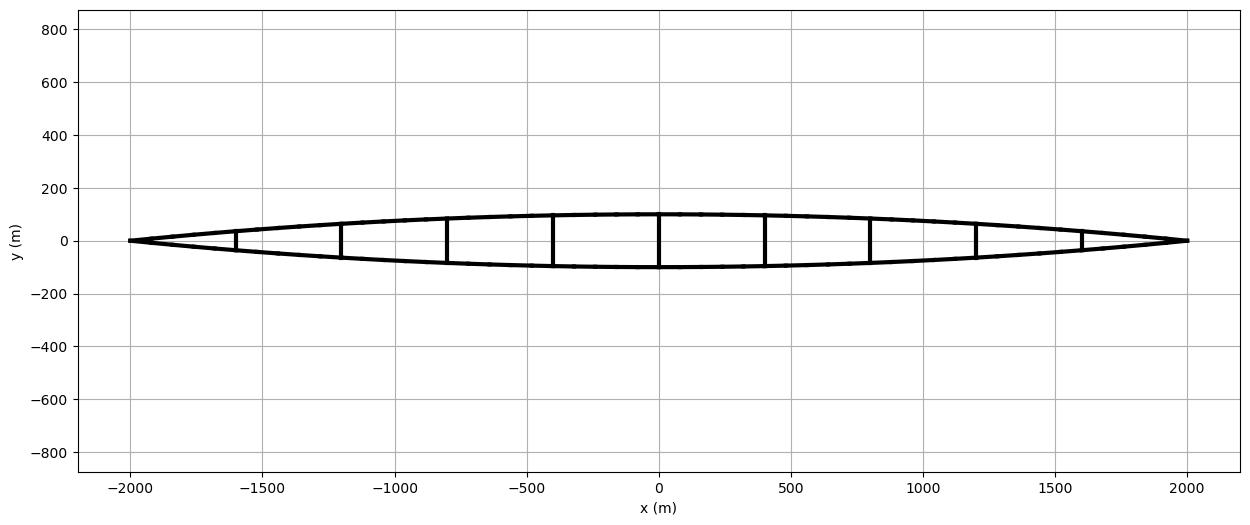

In [5]:
print("Nodes")
# for iNode in range(0, nNode):
#     print(iNode, "\t", NodeC[iNode][0], "\t", NodeC[iNode][1], "\t", NodeC[iNode][2])

plt.figure()
print("Elements")
for iEle in range(0, nEle):
    n1, n2, m, EA, EI, GJ, Im = Ele[iEle]
    n1 = int(round(n1))
    n2 = int(round(n2))
    #print(iEle, n1, n2, m, EA, EI, GJ, Im)    
    plt.plot( [NodeC[n1][0], NodeC[n2][0]], 
             [NodeC[n1][1], NodeC[n2][1]],              
             lw=3, color='k')

plt.grid("on")
plt.axis("equal")
plt.xlabel('x (m)')
plt.ylabel('y (m)')
pass

## Define the shape functions

Here we will use **linear** shape functions for the **axial displacement** and **cubic** shape functions for the **deflection and rotations**. Since we already know its expression and we already have the value of the elemental matrices, we skip this step in this tutorial. 

## Computation of the elemental matrices

In the theory we have seen that the mass and stiffness elemental matrices for the space frame using linear and cubic shape functions are given by:

| <img width="50%" src="./img/nb09_f01_3Ddofs_nptel.png" /> |
| :---- |
| Fig 1: Definition of 3 dofs per node, for the 2 noded elements. (This is from my lectures slides. To Be replaced) |

$$ M = \frac{mL}{420} 
\begin{bmatrix} 
140 & 0 & 0 & 0 & 0 & 0 & 70 & 0 & 0 & 0 & 0 & 0 \\ 
0 & 156 & 0 & 0 & 0 & 22L & 0 & 54 & 0 & 0 & 0 & -13L \\ 
0 & 0 & 156 & 0 & 22L & 0 & 0 & 0 & 54 & 0 & 13L & 0 \\ 
0 & 0 & 0 & 140 & 0 & 0 & 0 & 0 & 0 & 70 & 0 & 0 \\ 
0 & 0 & 22L & 0 & 4L^2 & 0 & 0 & 0 & -13L & 0 & -3L^2 & 0 \\ 
0 & 22L & 0 & 0 & 0 & 4L^2 & 0 & 13L & 0 & 0 & 0 & -3L^2 \\ 
70 & 0 & 0 & 0 & 0 & 0 & 140 & 0 & 0 & 0 & 0 & 0 \\ 
0 & 54 & 0 & 0 & 0 & 13L & 0 & 156 & 0 & 0 & 0 & -22L \\ 
0 & 0 & 54 & 0 & -13L & 0 & 0 & 0 & 156 & 0 & 22L & 0 \\ 
0 & 0 & 0 & 70 & 0 & 0 & 0 & 0 & 0 & 140 & 0 & 0 \\ 
0 & 0 & 13L & 0 & -3L^2 & 0 & 0 & 0 & 22L & 0 & 4L^2 & 0 \\
0 & -13L & 0 & 0 & 0 & -3L^2 & 0 & -22L & 0 & 0 & 0 & 4L^2
\end{bmatrix} $$
$$ \quad K = 
\begin{bmatrix} 
\frac{EA}{L} & 0 & 0 & 0 & 0 & 0 & \frac{-EA}{L} &  0 & 0 & 0 & 0 & 0\\ 
0 & \frac{12EI}{L^3} & 0 & 0 & 0 & \frac{6EI}{L^2} & 0 & \frac{-12EI}{L^3} & 0 & 0 & 0 & \frac{6EI}{L^2} \\ 
0 & 0 & \frac{12EI}{L^3} & 0 & -\frac{6EI}{L^2} & 0 & 0 & 0 & \frac{-12EI}{L^3} & 0 & -\frac{6EI}{L^2} & 0\\ 
0 & 0 & 0 & \frac{GJ}{L} & 0 & 0 & 0 & 0 & 0 & -\frac{GJ}{L} & 0 & 0 \\ 
0 & 0 & \frac{-6EI}{L^2} & 0 & \frac{4EI}{L} & 0 & 0 & 0 & \frac{6EI}{L^2} & 0 & \frac{2EI}{L} & 0 \\ 
0 & \frac{6EI}{L^2} & 0 & 0 & 0 & \frac{4EI}{L} & 0 & \frac{-6EI}{L^2} & 0 & 0 & 0 & \frac{2EI}{L} \\ 
\frac{-EA}{L} & 0 & 0 & 0 & 0 & 0 & \frac{EA}{L} & 0 & 0 & 0 & 0 & 0 \\ 
0 & -\frac{12EI}{L^3} & 0 & 0 & 0 & -\frac{6EI}{L^2} & 0 & \frac{12EI}{L^3} & 0 & 0 & 0 & -\frac{6EI}{L^2} \\ 
0 & 0 & -\frac{12EI}{L^3} & 0 & \frac{6EI}{L^2} & 0 & 0 & 0 & \frac{12EI}{L^3} & 0 & \frac{6EI}{L^2} & 0\\ 
0 & 0 & 0 & -\frac{GJ}{L} & 0 & 0 & 0 & 0 & 0 & \frac{GJ}{L} & 0 & 0 \\ 
0 & 0 & -\frac{6EI}{L^2} & 0 & \frac{2EI}{L} & 0 & 0 & 0 & \frac{6EI}{L^2} & 0 & \frac{4EI}{L} & 0 \\ 
0 & \frac{6EI}{L^2} & 0 & 0 & 0 & \frac{2EI}{L} & 0 & -\frac{6EI}{L^2} & 0 & 0 & 0 & \frac{4EI}{L}
\end{bmatrix}$$

These matrices are used directly when calling the `BeamMatrices` function within the assembly process.

## Global assembly

The last step is to compute the global matrices and the global forcing vector. We start by initializing the global matrices as 1-dimensional arrays.

Then we loop over elements and perform all the elemental operations.

In [6]:
LDOF = 6
nDof = LDOF*nNode  #6 dof per node
K = np.zeros(nDof*nDof)
M = np.zeros(nDof*nDof)
Q = np.zeros(nDof*nDof)
T_Stat = np.zeros(nDof)

from BeamMatrices import Beam3DMatrices

exeTime = [0.0, 0.0]
exeTime[0] = time.time()

for iEle in range(0, nEle):
    n1, n2, m, EA, EI, GJ, Im = Ele[iEle]
    n1 = int(round(n1))
    n2 = int(round(n2))
    
    n1dof = LDOF*n1 + np.arange(0,LDOF)
    n2dof = LDOF*n2 + np.arange(0,LDOF)    

    # Calculate outward unit normal
    xl = NodeC[n1][0]    # x-coordinate of left node
    yl = NodeC[n1][1]    # y-coordinate of left node
    xr = NodeC[n2][0]    # x-coordinate of right node
    yr = NodeC[n2][1]    # y-coordinate of rigth node
    L = np.sqrt((xr - xl)**2 + (yr - yl)**2)    # length
    nx = (xr - xl)/L
    ny = (yr-yl)/L

    lconn_Ten = 0.0
    if(iEle >= nEleMain):
        lconn_Ten = Conn_Ten

    Te = np.zeros(2*LDOF)
    Te[0] = -nx*lconn_Ten
    Te[1] = -ny*lconn_Ten
    Te[6] = nx*lconn_Ten
    Te[7] = ny*lconn_Ten

    T_Stat[n1dof] = T_Stat[n1dof] + Te[0:LDOF]
    T_Stat[n2dof] = T_Stat[n2dof] + Te[LDOF:2*LDOF]
    
    # Calculate elemental matrices
    Me, Ke, Qe = Beam3DMatrices(m, EA, EI, GJ, Im, (NodeC[n1], NodeC[n2]) )
    
    indexes = np.append(n1dof, n2dof)
    for i in range(0, 2*LDOF):
        for j in range(0, 2*LDOF):
            ij = indexes[i]*nDof + indexes[j]
            #print(ij)
            M[ij] = M[ij] + Me[i,j]
            K[ij] = K[ij] + Ke[i,j]
            Q[ij] = Q[ij] + Qe[i,j]

# Reshape the global matrix from a 1-dimensional array to a 2-dimensional array
M = M.reshape((nDof, nDof))
K = K.reshape((nDof, nDof))
Q = Q.reshape((nDof, nDof))
T_Stat[1] = 0
T_Stat[61] = 0
T_Stat[67] = 0
T_Stat[-5] = 0
T_Stat = T_Stat.reshape((nDof, 1))

M[np.isnan(M)] = 0
K[np.isnan(K)] = 0
Q[np.isnan(Q)] = 0
T_Stat[np.isnan(T_Stat)] = 0

exeTime[1] = time.time()
print("Execution time = ", exeTime[1] - exeTime[0], "s")

Execution time =  0.03673100471496582 s


That completes the filling of the matrices. Let's have a look at the matrices' structure.

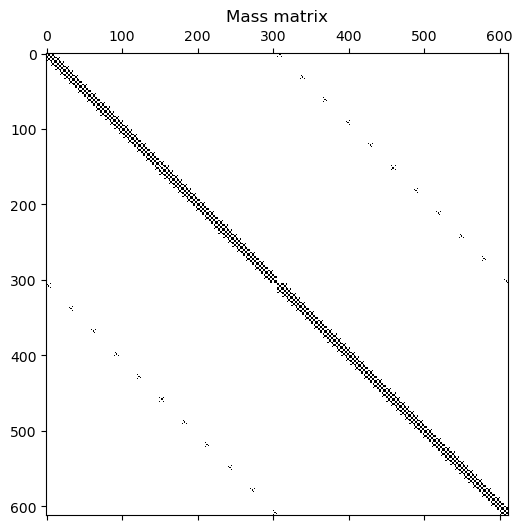

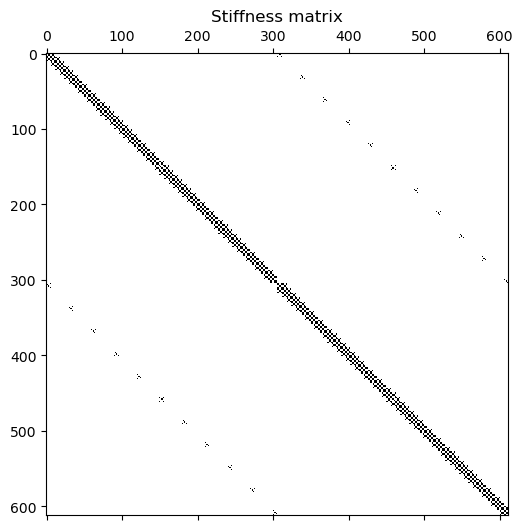

In [7]:
# Look at the matrix structure
plt.figure()
plt.spy(M)
plt.title("Mass matrix")
plt.figure()
plt.spy(K)
plt.title("Stiffness matrix")
pass

## Boundary conditions

To apply the boundary conditions, we will remove the rows associated to the fixed DOFs and add the contribution to the right-hand-side. First, we obtain the free and fixed DOFs.

[  0   1   2   3   4   5 300 301 302 303 304 305 306 307 308 309 310 311
 606 607 608 609 610 611]
[  6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23
  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 

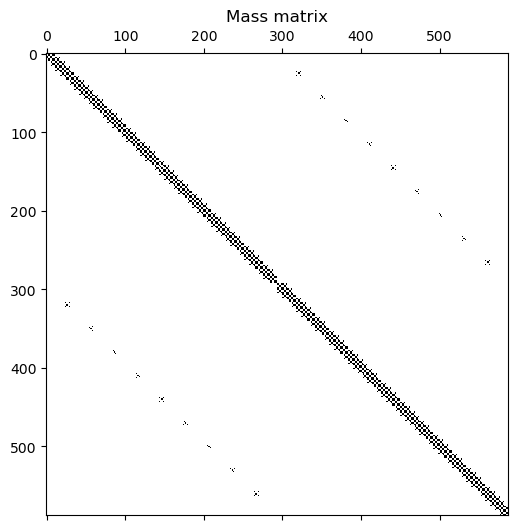

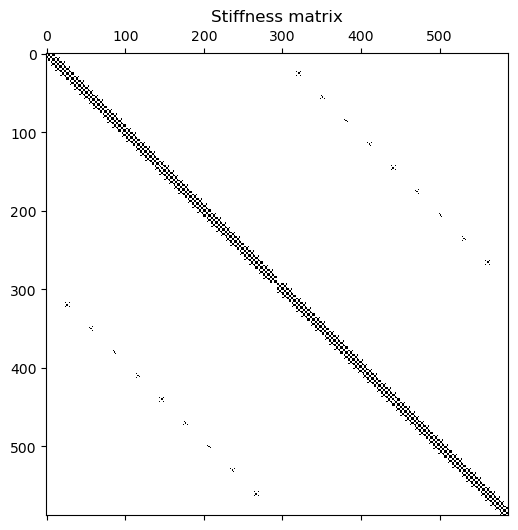

In [8]:
NodesClamp = (0, int(round(nNode/2-1)), int(round(nNode/2)), nNode-1)

# Prescribed dofs
DofsP = np.empty([0], dtype=int)
for n0 in NodesClamp:
    DofsP = np.append(DofsP, n0*LDOF + np.arange(0,LDOF))

# Free dofs
DofsF = np.arange(0, nDof)       # free DOFs
DofsF = np.delete(DofsF, DofsP)  # remove the fixed DOFs from the free DOFs array

print(DofsP)
print(DofsF)

M_FF = [ M[iRow,DofsF].tolist() for iRow in DofsF ]
K_FF = [ K[iRow,DofsF].tolist() for iRow in DofsF ]
Q_FF = [ Q[iRow,DofsF].tolist() for iRow in DofsF ]

T_Stat_FF = [ T_Stat[iRow,0:1].tolist() for iRow in DofsF ]

plt.figure()
plt.spy(M_FF)
plt.title("Mass matrix")
plt.figure()
plt.spy(K_FF)
plt.title("Stiffness matrix")
pass

## Static analysis

-719.999999999942
max = [-0.58178531]
max = [-95.95078855]


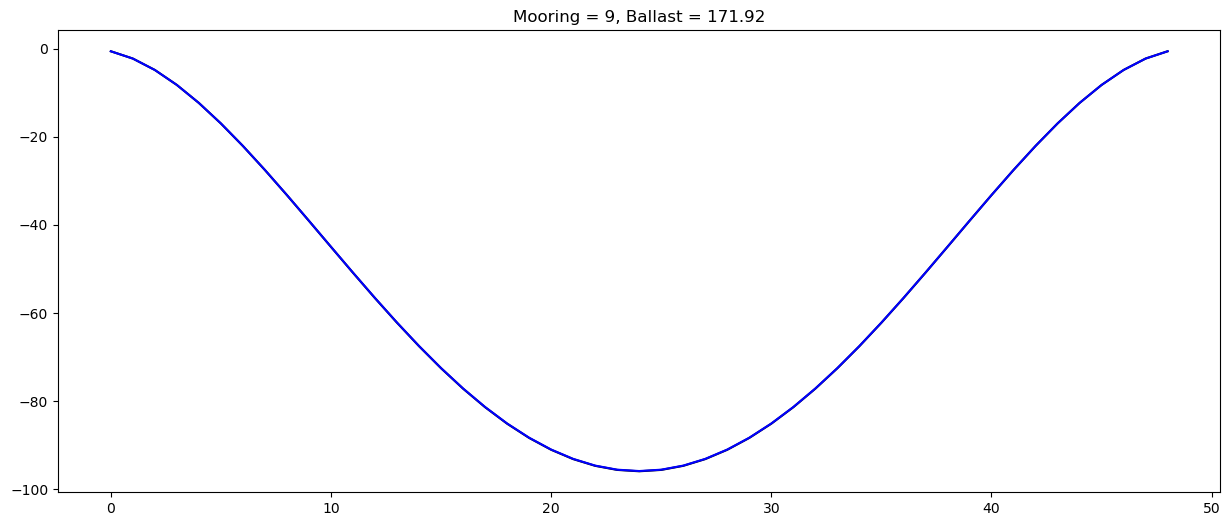

In [9]:
Weight = 1086.8
Buoyancy = 1267
Mooring = 9
Ballast = 171.92

qAll = (-Weight + Buoyancy - Mooring - Ballast)*1000
print(qAll)
q = np.zeros((len(DofsF),1))
q[2::6] = qAll


QInt = Q_FF @ q 

# print(T_Stat_FF)

QTot = QInt - T_Stat_FF

U_F = np.dot(np.linalg.inv(K_FF), QTot)

#print(U_F)

#print(U_F)



plt.plot(U_F[2:int(len(U_F)/2):6],'k')
plt.plot(U_F[2+int(len(U_F)/2):int(len(U_F)):6], 'b')
plt.title(f'Mooring = {Mooring}, Ballast = {Ballast}')

print(f'max = {max(U_F[2:int(len(U_F)/2):6])}')
print(f'max = {min(U_F[2:int(len(U_F)/2):6])}')


pass

In [10]:
Segment = np.array([10,20,30,40,50,100,400])
nodes = Segment*2+2
Value = np.array([23.95467814, 23.95467814, 24.01245458, 24.01384416, 24.01435013, 24.0148318,24.01490835])

Text(0, 0.5, 'D')

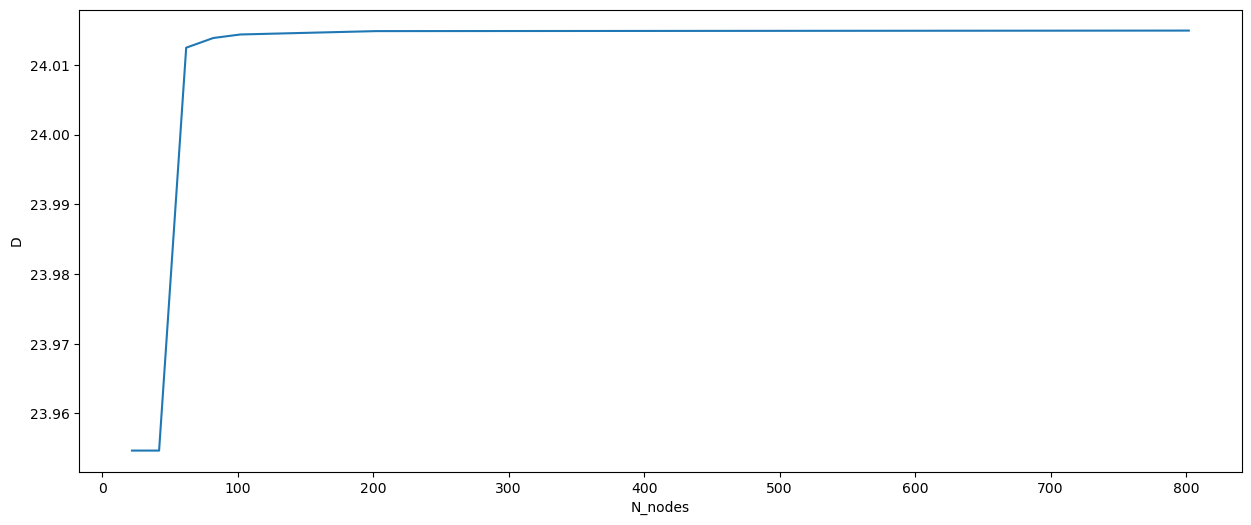

In [11]:
plt.plot(nodes,Value)
plt.xlabel('N_nodes')
plt.ylabel('D')

-2.9076890139208147
[6.023021e-02 6.023021e-02 2.453770e-03 1.064190e-03 5.582200e-04
 7.655000e-05]


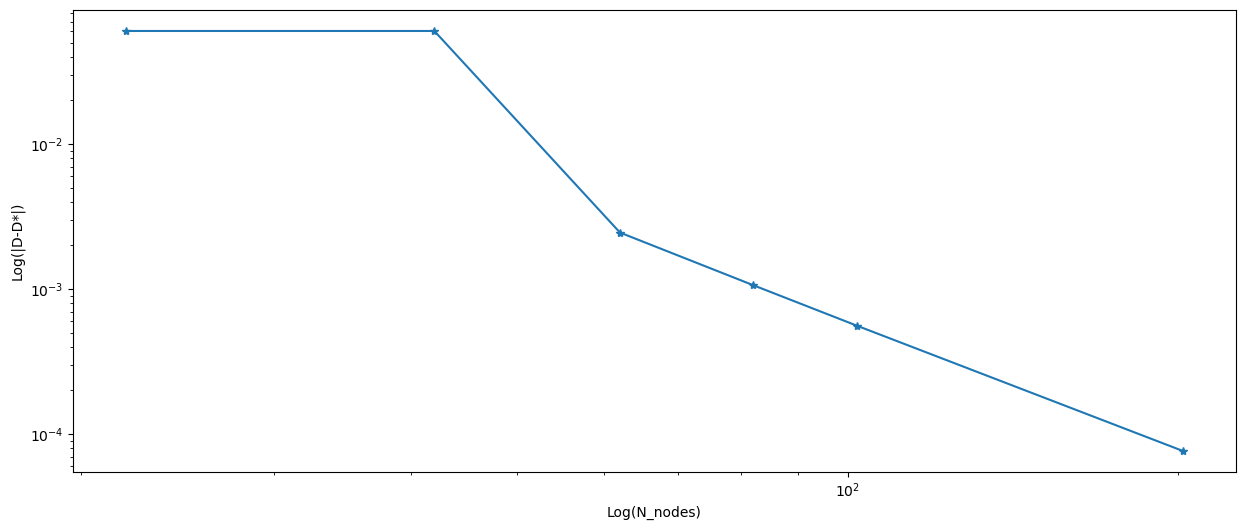

In [12]:
D_star = Value[-1]

D = np.delete(Value, -1, 0)
eps = abs(D - D_star)

#print(nodes)
nodes = np.delete(nodes,-1,0)

y = np.log10(eps)
x = np.log10(nodes)



plt.loglog(nodes, eps,"*-")
plt.xlabel('Log(N_nodes)')
plt.ylabel('Log(|D-D*|)')


alpha = (y[-1]-y[-2])/(x[-1]-x[-2])
print(alpha)

print(eps)

In [13]:
mat = np.dot(np.linalg.inv(M_FF), K_FF)
w2, vr = np.linalg.eig(mat)
w = np.sqrt(w2.real)
f = w/2/np.pi
print(len(f))

588


C:\Users\thoma\AppData\Local\Temp\ipykernel_11368\367166604.py:3: RuntimeWarning: invalid value encountered in sqrt
  w = np.sqrt(w2.real)


In [14]:
idx = f.argsort()
f = f[idx]
vr = vr[:,idx]

print(f)

[1.61692544e-03 1.61797102e-03 4.45499916e-03 4.46024099e-03
 4.46273587e-03 7.93376784e-03 8.74649041e-03 8.75105170e-03
 1.44544056e-02 1.44604268e-02 1.44677098e-02 1.97620484e-02
 2.16030644e-02 2.16137291e-02 2.60035335e-02 3.01682707e-02
 3.01743465e-02 3.01890571e-02 4.01742449e-02 4.01937003e-02
 4.05603231e-02 5.15971393e-02 5.16020796e-02 5.16272628e-02
 6.44149184e-02 6.44694748e-02 6.45281103e-02 7.04464149e-02
 7.05380255e-02 7.21498031e-02 7.26671744e-02 7.51689703e-02
 7.62376738e-02 7.88036429e-02 7.88042397e-02 7.88130467e-02
 8.36953207e-02 8.50786443e-02 9.44673770e-02 9.45097201e-02
 9.45243807e-02 1.11610634e-01 1.11623629e-01 1.11662382e-01
 1.17817568e-01 1.18689415e-01 1.30185136e-01 1.30239279e-01
 1.30245792e-01 1.36165372e-01 1.50189479e-01 1.50233658e-01
 1.50259572e-01 1.50693061e-01 1.66352591e-01 1.71623416e-01
 1.71703630e-01 1.71713332e-01 1.83347638e-01 1.94486582e-01
 1.94577677e-01 1.94596877e-01 2.01874643e-01 2.18777596e-01
 2.18880506e-01 2.189564

In [15]:
nMode = len(f)
print(nMode)
ModalShape = np.zeros((nDof, nMode))
ModalShape[DofsF,:] = vr

588


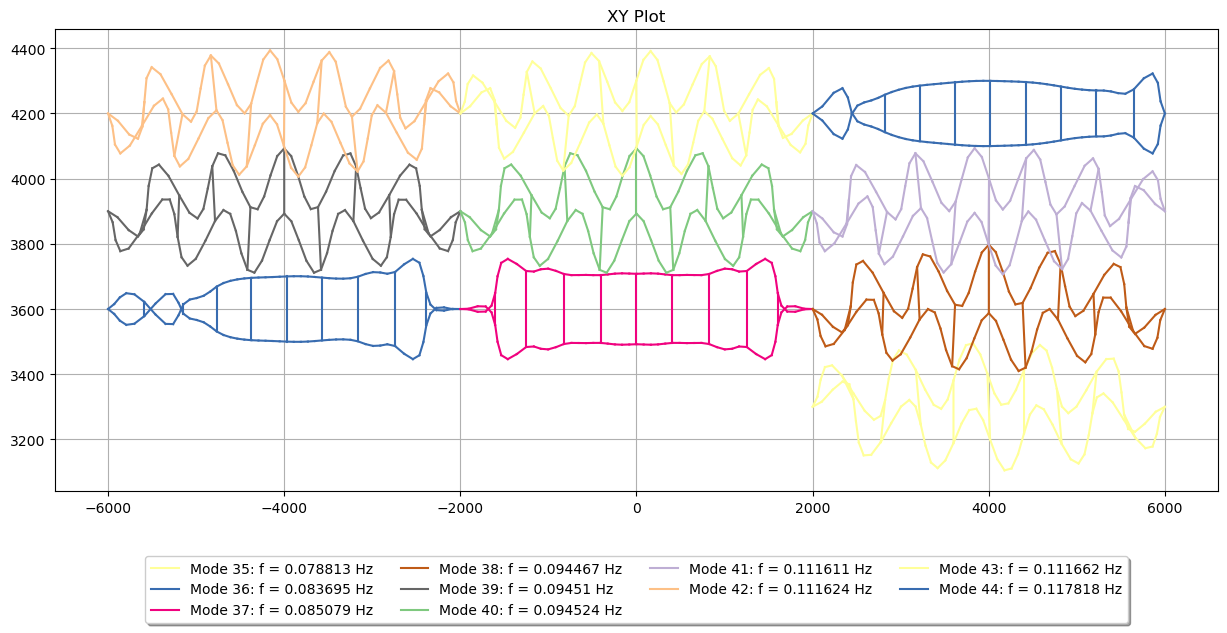

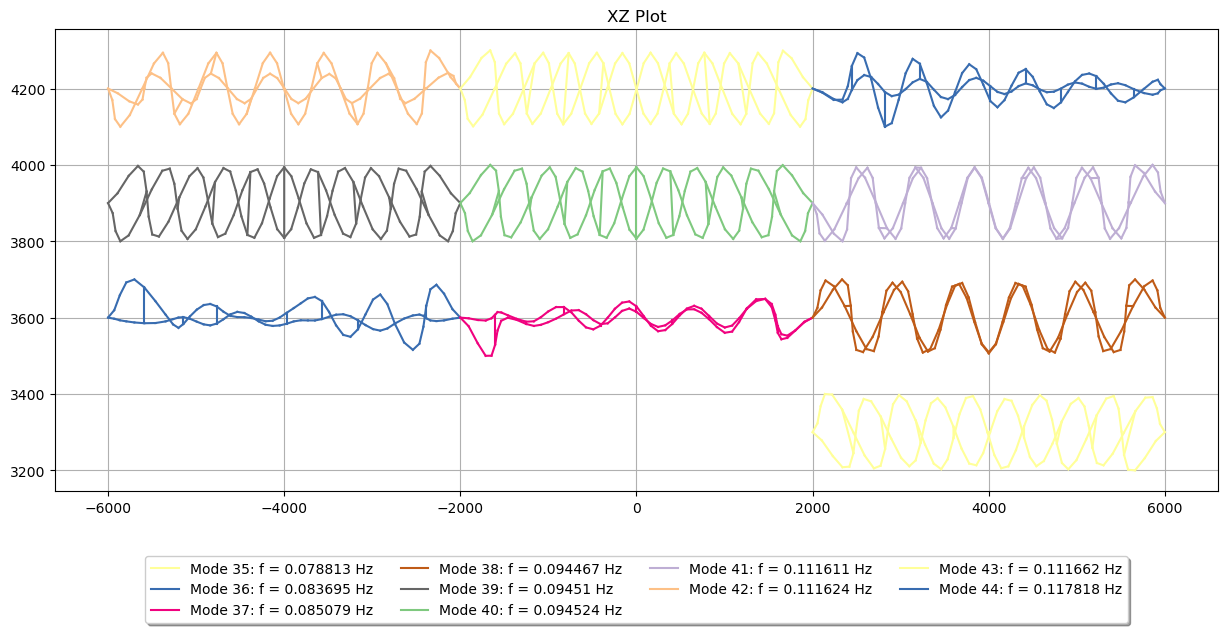

In [33]:
# Plotting mode shapes
plt.figure()
cmap = plt.colormaps.get_cmap('Accent')
cmap = cmap.colors
nCmap = len(cmap)

nCol = 2
nRow = int(np.floor(nMode/nCol))+1

vMode1 = 35
vMode2 = vMode1+10

def plotEle(DisplacedNode):
    for iElem in np.arange(0, nEle):
        NodeLeft = int(round(Ele[iElem][0]))
        NodeRight = int(round(Ele[iElem][1]))
        if(iElem == 0):
            plt.plot([DisplacedNode[0][NodeLeft], DisplacedNode[0][NodeRight]], 
                     [DisplacedNode[1][NodeLeft], DisplacedNode[1][NodeRight]], color=cmap[iMode%nCmap], 
                     label = "Mode "+str(iMode)+": f = "+str(np.round(f[iMode],6))+" Hz")
        else:
            plt.plot([DisplacedNode[0][NodeLeft], DisplacedNode[0][NodeRight]], 
                     [DisplacedNode[1][NodeLeft], DisplacedNode[1][NodeRight]], color=cmap[iMode%nCmap])


# XY Plot
for iMode in np.arange(vMode1, vMode2):    
    Shape = ModalShape[:, iMode]

    # Scale the mode such that maximum deformation is 10
    MaxTranslationx = np.max(np.abs(Shape[0::LDOF]))
    MaxTranslationy = np.max(np.abs(Shape[1::LDOF]))
    MaxTranslationz = np.max(np.abs(Shape[2::LDOF]))
    Shape[0::LDOF] = Shape[0::LDOF]/MaxTranslationx*100
    Shape[1::LDOF] = Shape[1::LDOF]/MaxTranslationy*100
    Shape[2::LDOF] = Shape[2::LDOF]/MaxTranslationz*100    

    # Get the deformed shape
    DisplacedNode = ([i[0] + (iMode%3-1)*4000 for i in NodeC] + Shape[0::LDOF], 
                     [i[1] + 300*np.floor(iMode/3) for i in NodeC] + Shape[1::LDOF])
    
    plotEle(DisplacedNode)
    plt.title("XY Plot")        
    plt.grid('on')
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3),
          ncol=4, fancybox=True, shadow=True)    


# XZ Plot
plt.figure()
for iMode in np.arange(vMode1, vMode2):    
    Shape = ModalShape[:, iMode]

    # Scale the mode such that maximum deformation is 10
    MaxTranslationx = np.max(np.abs(Shape[0::LDOF]))
    MaxTranslationy = np.max(np.abs(Shape[1::LDOF]))
    MaxTranslationz = np.max(np.abs(Shape[2::LDOF]))
    Shape[0::LDOF] = Shape[0::LDOF]/MaxTranslationx*100
    Shape[1::LDOF] = Shape[1::LDOF]/MaxTranslationy*100
    Shape[2::LDOF] = Shape[2::LDOF]/MaxTranslationz*100

    # Get the deformed shape
    DisplacedNode = ([i[0] + (iMode%3-1)*4000 for i in NodeC] + Shape[0::LDOF],
                     [i[2] + np.floor(iMode/3)*300 for i in NodeC] + Shape[2::LDOF])
    
    plotEle(DisplacedNode)
    plt.title("XZ Plot")    
    plt.grid('on')
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3),
          ncol=4, fancybox=True, shadow=True)    
    


pass

In [17]:
nMode = 79 #len(f)
modeLow = 1
PHI = vr[:, modeLow:modeLow+nMode]

Mm = np.zeros(nMode)
Km = np.zeros(nMode)
Cm = np.zeros(nMode)
ModalDampRatio = 0.01
# Compute your "nMode" entries of the modal mass, stiffness and damping
for iMode in np.arange(0,nMode):    
    Mm[iMode] = PHI[:,iMode].T @ M_FF @ PHI[:,iMode]
    Km[iMode] = PHI[:,iMode].T @ K_FF @ PHI[:,iMode]    
    Cm[iMode] = 2*ModalDampRatio*np.sqrt(Mm[iMode]*Km[iMode])
    print('Computing Mode: ',iMode)
    print('Mm = ',Mm[iMode],', Km = ', Km[iMode],', Cm = ', Cm[iMode])
    

# Natural frequencies (rad/s)
omega = np.zeros(nMode)

# Compute the modal mass, stiffness, and natural frequencies
for iMode in np.arange(0, nMode):
    Mm[iMode] = PHI[:, iMode].T @ M_FF @ PHI[:, iMode]
    Km[iMode] = PHI[:, iMode].T @ K_FF @ PHI[:, iMode]
    omega[iMode] = np.sqrt(Km[iMode] / Mm[iMode])
    print('Computing Mode: ', iMode)
    print('Mm = ', Mm[iMode], ', Km = ', Km[iMode], ', omega = ', omega[iMode])

# Select two modes to calculate the Rayleigh damping coefficients (e.g., mode 0 and mode nMode-1)
omega1 = omega[0]
omega2 = omega[nMode-1]

# Calculate Rayleigh damping coefficients (alpha and beta)
beta = 2 * ModalDampRatio / (omega1 + omega2)
alpha = ModalDampRatio * (omega1 + omega2) / 2

# Compute the modal damping matrix with Rayleigh damping
for iMode in np.arange(0, nMode):
    Cm[iMode] = alpha * Mm[iMode] + beta * Km[iMode]


Computing Mode:  0
Mm =  9226993.054860394 , Km =  953.5893848967339 , Cm =  1876.0343953809333
Computing Mode:  1
Mm =  9235735.97174022 , Km =  7236.465559168826 , Cm =  5170.4578239484645
Computing Mode:  2
Mm =  9235724.890973873 , Km =  7253.4959706155205 , Cm =  5176.535261442443
Computing Mode:  3
Mm =  9225401.262591952 , Km =  7253.495869153874 , Cm =  5173.641268951595
Computing Mode:  4
Mm =  9237406.321020516 , Km =  22954.548736138167 , Cm =  9209.570969190176
Computing Mode:  5
Mm =  9234307.394585632 , Km =  27888.921031921276 , Cm =  10149.578704795296
Computing Mode:  6
Mm =  9224683.878241334 , Km =  27888.922000003386 , Cm =  10144.288819921509
Computing Mode:  7
Mm =  9233546.704500861 , Km =  76160.32024064068 , Cm =  16771.760479707526
Computing Mode:  8
Mm =  9233585.296769718 , Km =  76224.10390752878 , Cm =  16778.817182388095
Computing Mode:  9
Mm =  9224291.989297954 , Km =  76224.10859508553 , Cm =  16770.371901720308
Computing Mode:  10
Mm =  9235936.503925

In [18]:
forcing = np.loadtxt('wave_force.txt')
print(forcing)

def F(t):
    q_wave = forcing[int(4*t)-1]      
    q = np.zeros((len(DofsF),1))
    q[1::6] = q_wave + 18597.6
    q[2::6] = q_wave 
    
    QTemp = Q_FF @ q 
    
    Qm = np.zeros(nMode)
    for iMode in np.arange(0,nMode):
        Qm[iMode] = (PHI[:, iMode].T @ QTemp)[0]
    
    return Qm

[ 107211.45474982  117227.97188205   68135.11306354 ... -215067.33058459
 -198014.95958485 -174361.22468633]


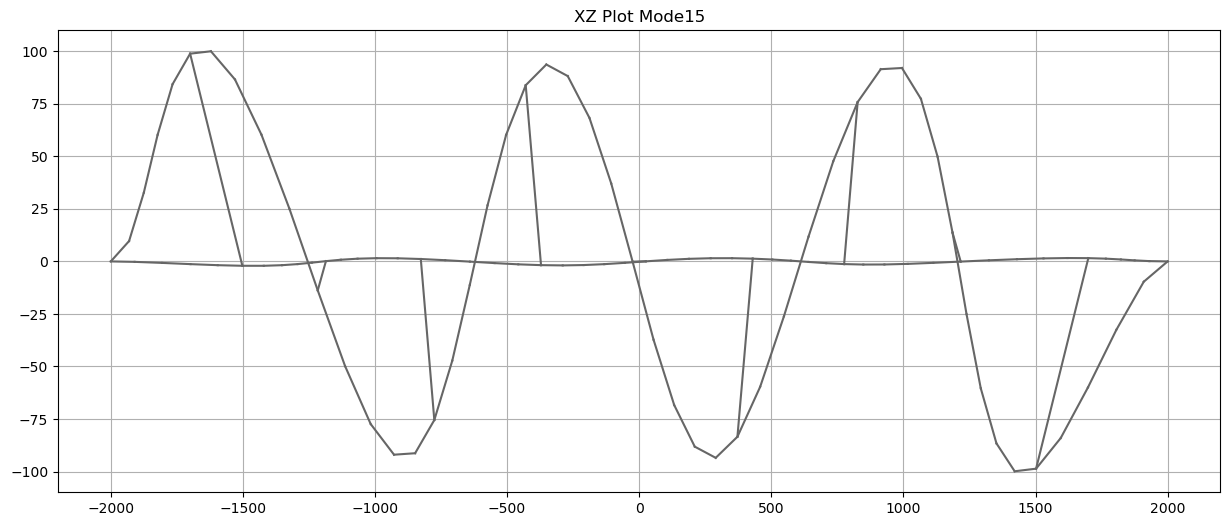

In [19]:
plt.figure()
for iMode in [15]:    
    Shape = ModalShape[:, iMode]

    # Scale the mode such that maximum deformation is 10
    MaxTranslationx = np.max(np.abs(Shape[0::LDOF]))
    MaxTranslationy = np.max(np.abs(Shape[1::LDOF]))
    MaxTranslationz = np.max(np.abs(Shape[2::LDOF]))
    Shape[0::LDOF] = Shape[0::LDOF]/MaxTranslationx*100
    Shape[1::LDOF] = Shape[1::LDOF]/MaxTranslationy*100
    Shape[2::LDOF] = Shape[2::LDOF]/MaxTranslationz*100

    # Get the deformed shape
    DisplacedNode = ([i[0] for i in NodeC] + Shape[0::LDOF],
                     [i[2] for i in NodeC] + Shape[2::LDOF])
    
    plotEle(DisplacedNode)
    plt.title("XZ Plot Mode"+str(iMode))    
    plt.grid('on')
    

In [20]:
# Solve the resulting ODE:
def qdot(t,q):
    Um = q[0:nMode]
    Vm = q[nMode:2*nMode]
    Am = ( F(t) - (Km * Um + Cm * Vm) ) / Mm
    return np.append(Vm,Am)

q0 = np.zeros(2*nMode)
# q0[11] = 1


import scipy.integrate as scpi
q = scpi.solve_ivp(fun=qdot,y0=q0,t_span=[0,1000], t_eval=np.arange(0,1000,0.25))

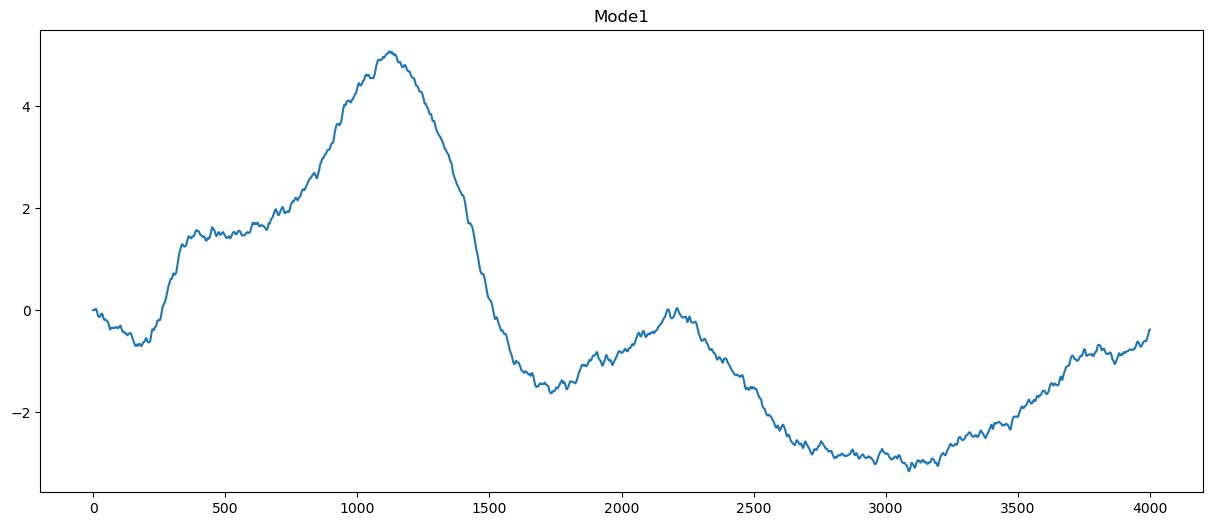

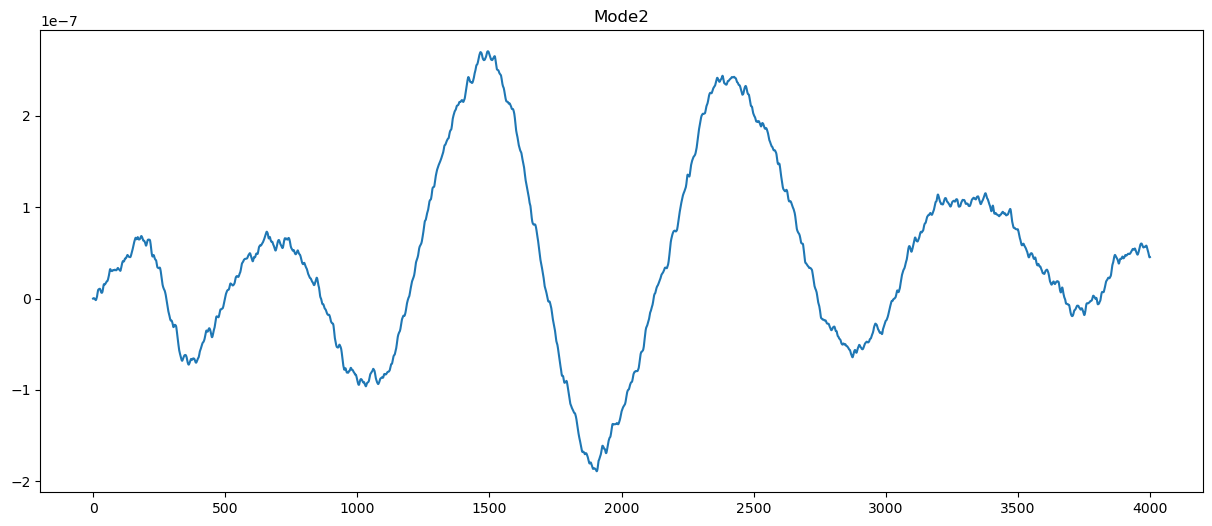

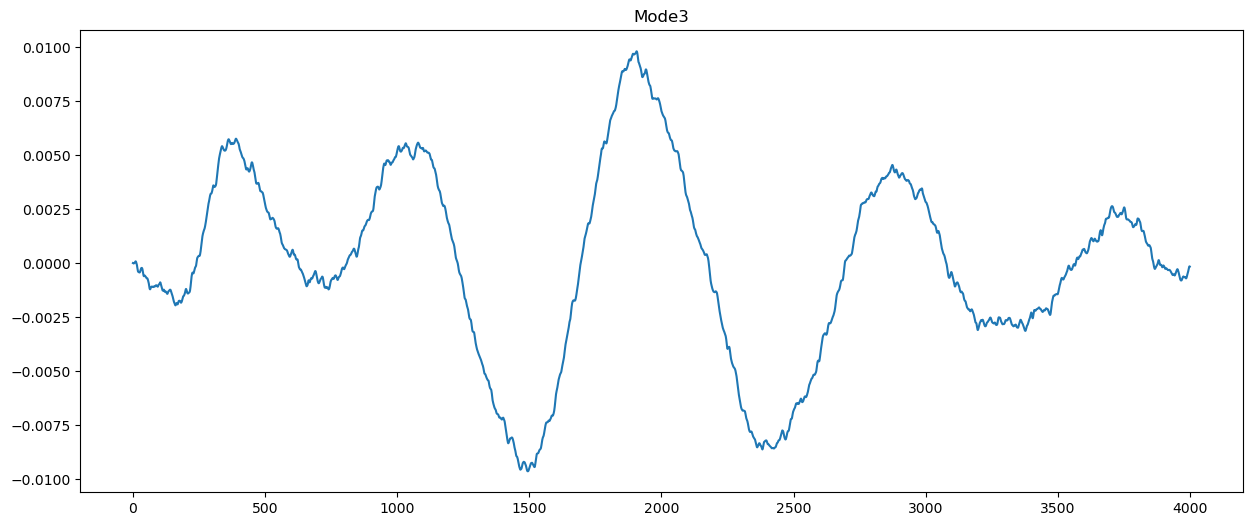

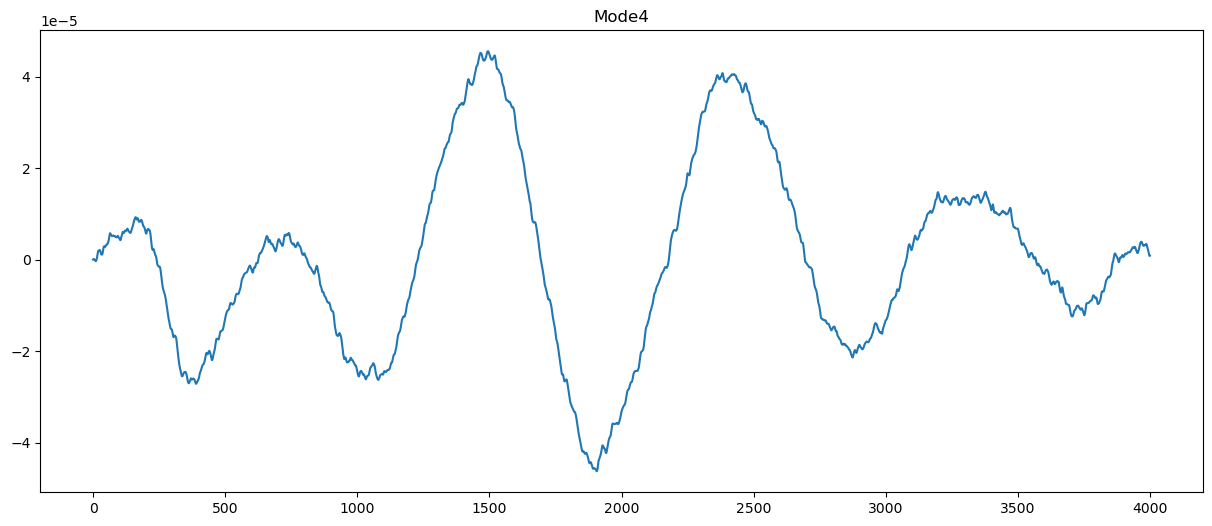

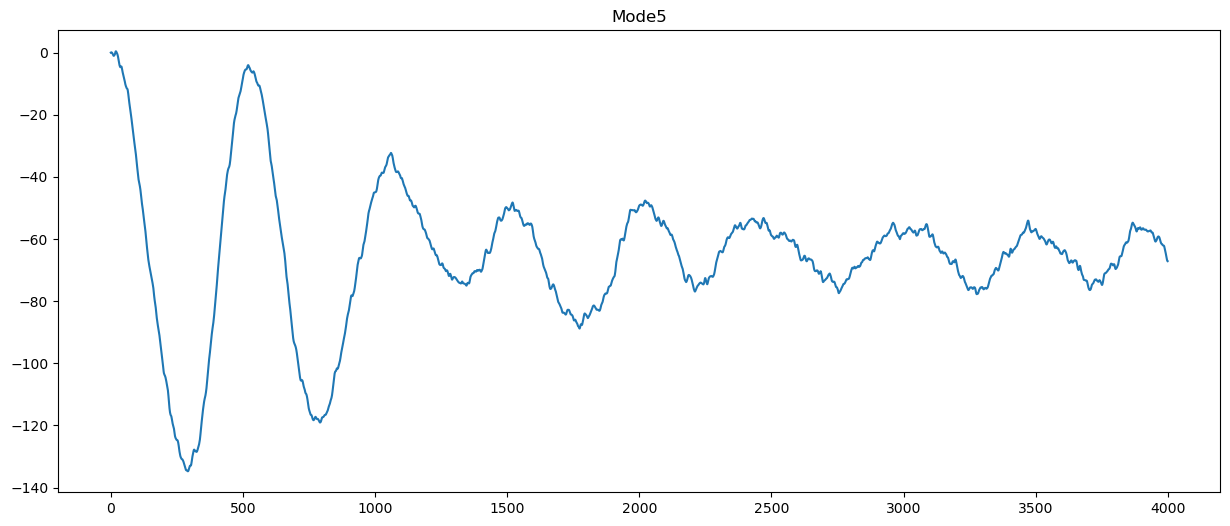

In [21]:
mode0 = 0
mode1 = mode0+5
for iMode in range(mode0, mode1):
    plt.figure()
    plt.plot(q.y[iMode])
    plt.title("Mode" + str(modeLow+iMode) )
pass

588
98.0
(4000, 588)


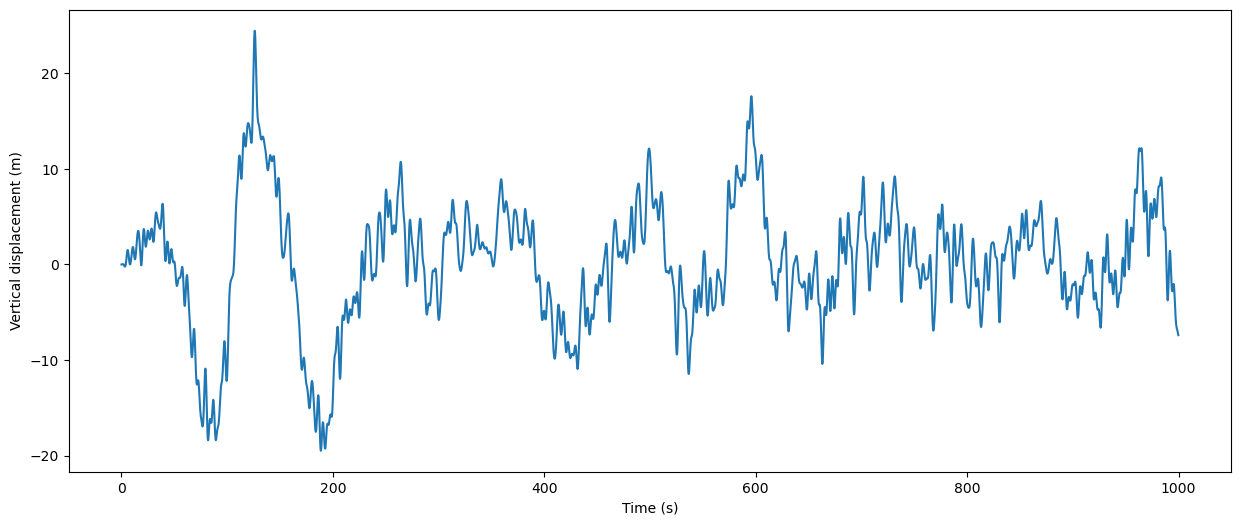

In [30]:
# Show the result on the original coordinates
U_F = np.zeros((len(q.t),len(PHI[:,0])))

print(len(PHI[:,0]))
for iMode in np.arange(0,nMode):
    for it in np.arange(0,len(q.t)):
        U_F[it,:] += PHI[:,iMode].T * q.y[iMode][it]
        
print(len(PHI[:,0])/6)
        
#plt.plot(U_F[100,1::3])
plt.plot( q.t, U_F[:,2+6*24])
plt.xlabel('Time (s)')
plt.ylabel('Vertical displacement (m)')

print(U_F.shape)

pass

(4000, 612)
(4000, 598)
588
(4000, 588)


Text(0.5, 1.0, 'XZ Plot')

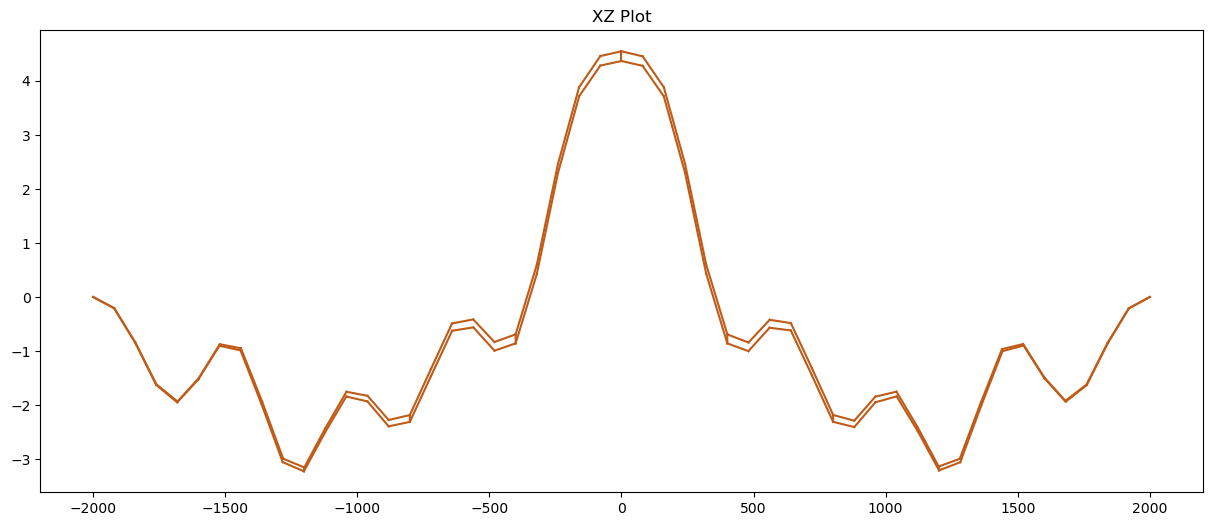

In [23]:
# Get the deformed shape

tspan = 4000
u_total = np.zeros((tspan, nDof))

print(u_total.shape)

print(u_total[:, DofsF[0]:DofsF[-2]].shape)
print(len(DofsF))
print(U_F.shape)

u_total[:, DofsF] = U_F

DisplacedNode = ([i[0] for i in NodeC] + u_total[150,0::LDOF],
                 [i[2] for i in NodeC] + u_total[150,2::LDOF])

plotEle(DisplacedNode)
plt.title("XZ Plot")   

In [24]:
# for i in range(49):
#     #print(i*6+1, i*6+55)
#     plt.figure()
#     plt.title('Deflection of the Centre Node')
#     plt.plot( q.t, U_F[:,i*6+2])
#     #plt.plot( q.t, U_F[:,i*6+55])

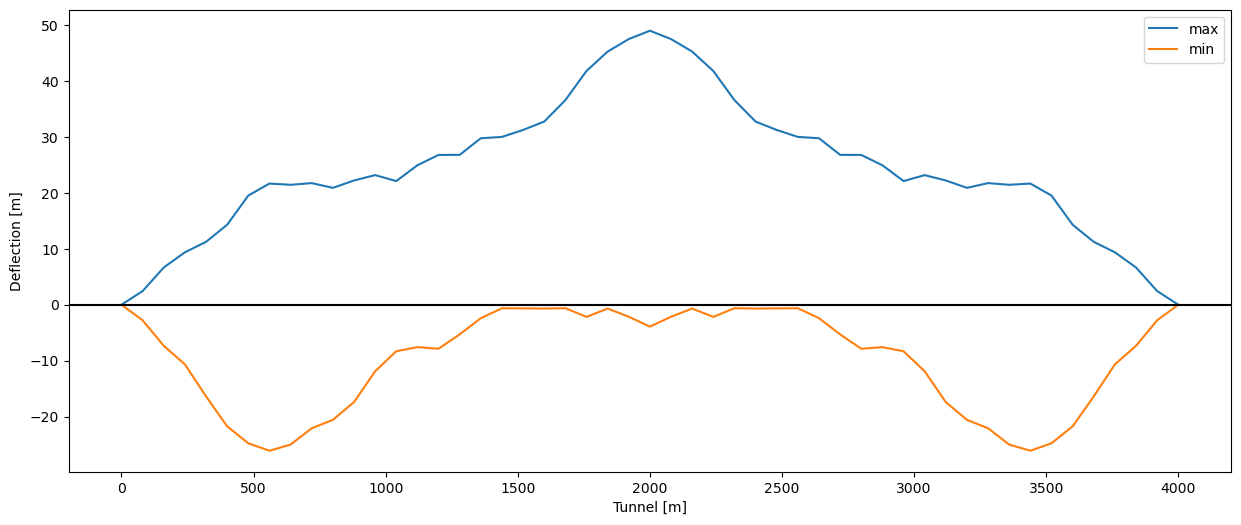

In [25]:
Hor_max = [0]
Hor_min = [0]
k = 1
for i in range(49):
    Hor_max.append(np.max(U_F[:,i*6+k]))
    #print(np.argmax(U_F[:,i*6+k]))
    Hor_min.append(np.min(U_F[:,i*6+k]))
Hor_max.append(0)    
Hor_min.append(0)  
plt.plot(np.linspace(0,4000,51), Hor_max, label='max')
plt.plot(np.linspace(0,4000,51), Hor_min, label='min')
plt.xticks(np.linspace(0,4000,9))
plt.xlabel('Tunnel [m]')
plt.ylabel('Deflection [m]')
plt.axhline(0, color='k', linestyle='-')
plt.legend()

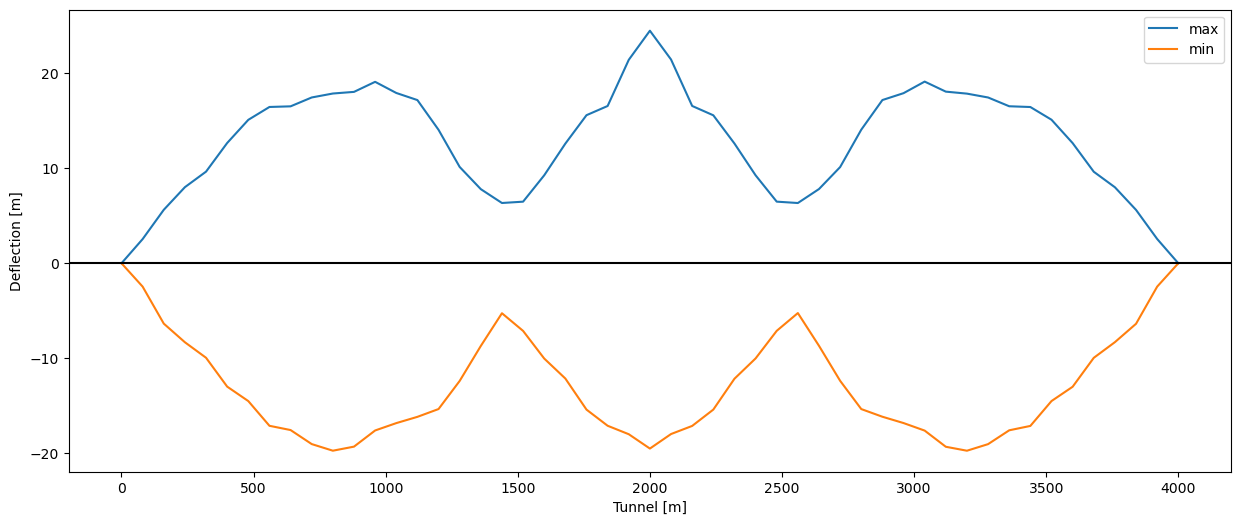

In [26]:
Ver_max = [0]
Ver_min = [0]
k = 2
for i in range(49):
    Ver_max.append(np.max(U_F[:,i*6+k]))
    #print(np.argmax(U_F[:,i*6+k]))
    Ver_min.append(np.min(U_F[:,i*6+k]))
Ver_max.append(0)    
Ver_min.append(0)  
plt.plot(np.linspace(0,4000,51), Ver_max, label='max')
plt.plot(np.linspace(0,4000,51), Ver_min, label='min')
plt.xticks(np.linspace(0,4000,9))
plt.axhline(0, color='k', linestyle='-')
plt.xlabel('Tunnel [m]')
plt.ylabel('Deflection [m]')
plt.legend()

In [27]:
def calculate_axial_stress_FEM2(u_displ):
    

    # Length of the element
    L_elem = 4000/50	

    Beam_EI = 6.14e12
    E_c = 50e9
    a = 11.7

    # Observation point
    x_obs = L_elem/2
    
    ux1 = uy1 = ry1 = ux2 = uy2 = ry2 = np.zeros(51) 

    for i in range(50):
        ux1[i] = (np.max(U_F[3881,i*6+0]))
        uy1[i] = (np.max(U_F[3881,i*6+1]))
        ry1[i] = (np.max(U_F[3881,i*6+3]))

        ux2[i] = (np.max(U_F[3881,i*6+3]))
        uy2[i] = (np.max(U_F[3881,i*6+7]))
        ry2[i] = (np.max(U_F[3881,i*6+9]))

    print((uy1), uy2)


    Myk = Beam_EI/(L_elem**2)*((-6+(12*x_obs/L_elem))*uy1
                                + (4*L_elem + 6*x_obs)*ry1
                                + -(-6+(12*x_obs/L_elem))*uy2
                                + (-3*L_elem + 6*x_obs)*ry2)
    

    Iy = (Beam_EI/E_c)

    sigma_M = ((Myk*(a/2))/Iy)#10**6 #MPa
    return sigma_M

In [28]:
a = calculate_axial_stress_FEM2(U_F) /10**6
print((a))

[ 0.00093549  0.00114391  0.00029729 -0.00110838 -0.00202907 -0.00199275
 -0.00145735 -0.00110894 -0.00109641 -0.00107253 -0.00077676 -0.00031171
  0.00013577  0.00057596  0.00107701  0.00148757  0.00151647  0.00110527
  0.00056551  0.00026451  0.00026864  0.0003695   0.00040534  0.00040114
  0.00040509  0.00036679  0.00026535  0.00026686  0.0005749   0.00111276
  0.00151237  0.00147515  0.00107048  0.00058257  0.00014545 -0.00031307
 -0.00078739 -0.00107646 -0.00108695 -0.00110154 -0.00146986 -0.00201642
 -0.00203168 -0.00107282  0.00034487  0.00115675  0.00089891  0.00020047
 -0.00020203 -0.00085018  0.        ] [ 0.00093549  0.00114391  0.00029729 -0.00110838 -0.00202907 -0.00199275
 -0.00145735 -0.00110894 -0.00109641 -0.00107253 -0.00077676 -0.00031171
  0.00013577  0.00057596  0.00107701  0.00148757  0.00151647  0.00110527
  0.00056551  0.00026451  0.00026864  0.0003695   0.00040534  0.00040114
  0.00040509  0.00036679  0.00026535  0.00026686  0.0005749   0.00111276
  0.00151237 

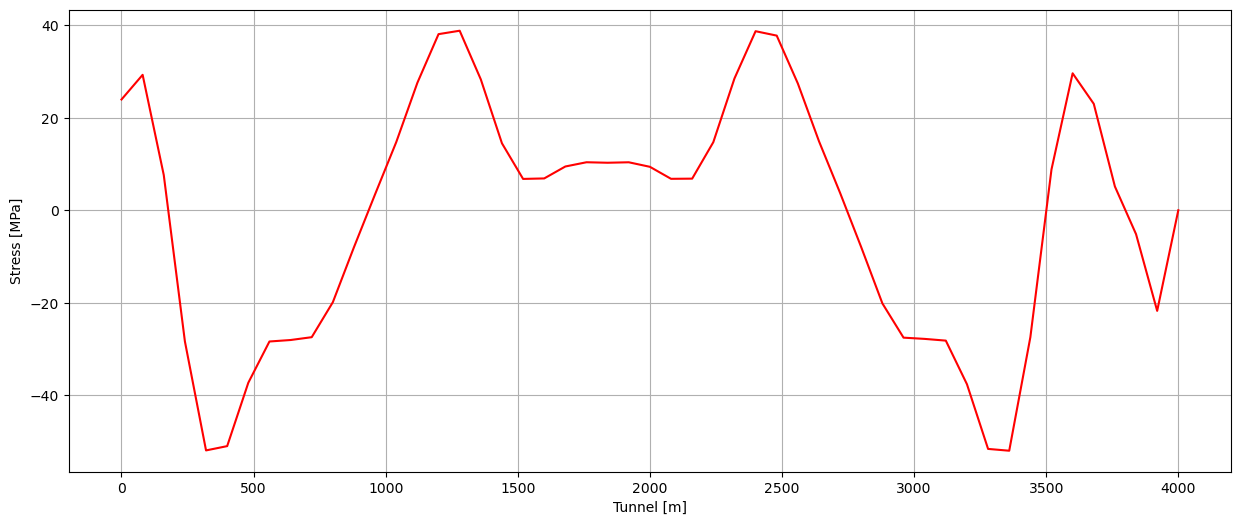

In [29]:
x= np.linspace(0,4000,51)
#a[2] = a[6] = 21.24
plt.plot(x, a, color = 'red')
plt.xlabel('Tunnel [m]')
plt.ylabel('Stress [MPa]')
plt.grid()